<h1>K-Medians<h1>
<h3>Escolher os centroides</h3>
<h3>Agrupar as amostras para o cluster</h3>
<h3>Atualiza o valor dos centróides dos clusters</h3>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd 

style.use('ggplot')

In [3]:
data = pd.read_csv('bairros.csv')
for i in range(data.shape[0]):
    a = data.at[i,'Bairro']
    if a == 'Val-de-Cães': print(i)

13


In [4]:
centroids = {0:13}
k = 4
shape = data.shape[0]

In [5]:
#distancia euclidiana
def eucDistance(xa,xb,ya,yb):
    dist = np.sqrt((float(xa)-float(xb))**2 + (float(ya)-float(yb))**2)
    return dist

In [6]:
def lat_lon(i):
    lat = data.at[i,'Latitude']
    lon = data.at[i,'Latitude']
    return lat,lon

In [10]:
#calcula a distância total
def distTotal():
    total_dist = 0
    for centroid in centroids:
        centr = centroids[centroid]
        for sample in range(shape):
            lat_sample,lon_sample = lat_lon(sample)
            lat_centroid,lon_centroid = lat_lon(centr)
            total_dist += eucDistance(lat_sample, lat_centroid, lon_sample, lon_centroid)
    print(total_dist)

In [13]:
#inicializa os centroides
centroides = [13]
for i in range(1,k):
    randn = np.random.randint(shape)
    centroids[i] = int(randn)
    centroides += [int(randn)]

#os centroides devem ser distintos
for i in range(k):
    for j in range(k):
        if i == j: continue
        elif j == 0 : continue
        if centroids[i] == centroids[j]:
            randn = np.random.randint(shape)
            centroids[j] = int(randn)
    
print(centroids)
        
#K medoids
for j in range(500):
    classes = {}
    for i in range(k): classes[i] = []
    for amostra in range(0,shape): #percorre as amostras
        distancias = []
        for centroid in centroids:
            centr = centroids[centroid]
            lat_amostra,lon_amostra = lat_lon(amostra)
            lat_centroid,lon_centroid = lat_lon(centr)
            distancias += [eucDistance(lat_amostra, lat_centroid, lon_amostra, lon_centroid)]
        centroid = distancias.index(min(distancias))
        classes[centroid].append(amostra)
    for classe in classes: #atualiza os centroides
        if classe == 0: continue
        mediana = np.around(np.median(classes[classe], axis = 0))
        while mediana in centroides: mediana = np.random.randint(shape)
        centroides[classe] = int(mediana)
        centroids[classe] = int(mediana)

#os centroides devem ser distintos
for classe in classes:
    for centroid in centroids:
        centr = centroids[centroid]
        if centr in classes[classe] and classe != centroid:
            classes[classe].remove(centr)
            classes[centroid].append(centr)
        
print(centroids)
print(classes)
print(centroides)
distTotal()

{0: 13, 1: 9, 2: 37, 3: 0}
{0: 13, 1: 7, 2: 19, 3: 36}
{0: [9, 12, 13, 14, 15, 17, 18, 32, 34, 35, 37, 38], 1: [0, 3, 4, 5, 6, 7, 8, 10, 22, 33], 2: [1, 2, 16, 19, 20, 21, 23], 3: [11, 24, 25, 26, 27, 28, 29, 30, 31, 36]}
[13, 7, 19, 36]
8.77348591442054


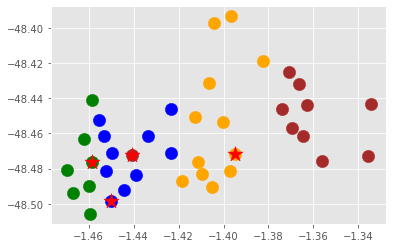

In [14]:
colors=['orange', 'blue', 'green','brown']
for i in range(shape):    
    for classe in classes:
        if i in classes[classe]: plt.scatter(data.at[i,'Latitude'], data.at[i,'Longitude'],s=150, c = colors[classe])
for i in range(len(centroids)):
    plt.scatter(data.at[centroids[i],'Latitude'], data.at[centroids[i],'Longitude'], marker='*', c='r', s=250)